# II. Captura de Temporalidad con ARIMA

### 1. Importamos librerías necesarias: pandas para leer datos, statsmodels para modelo ARIMA, métricas de sklearn.

In [20]:
# 1. Importar librerías
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt


### 2. Cargamos los datos de un semestre en un DataFrame de Pandas.

In [22]:
# 2. Cargar datos 
df = pd.read_csv('../tableClaude.csv')

In [23]:
# 3. Entrenar ARIMA
# Seleccionar una columna/variable para modelar 
data = df['sem1']  

### 3. Generamos un gráfico de autocorrelación con plt.acorr() para identificar orden tentativo del modelo.

(array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
         8,  9]),
 array([0.45698925, 0.5       , 0.5483871 , 0.60215054, 0.62365591,
        0.69354839, 0.72580645, 0.82795699, 0.84946237, 1.        ,
        0.84946237, 0.82795699, 0.72580645, 0.69354839, 0.62365591,
        0.60215054, 0.5483871 , 0.5       , 0.45698925]),
 <matplotlib.lines.Line2D at 0x2567a0af750>)

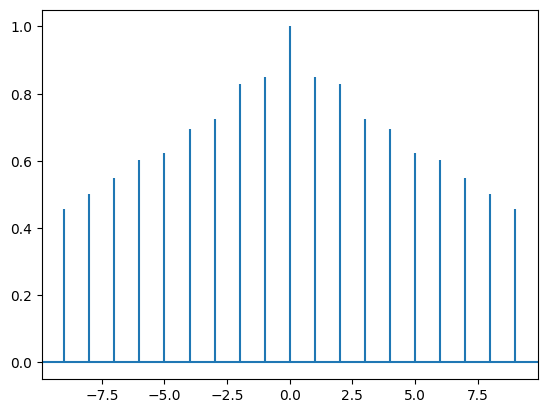

In [24]:
# Gráfico de autocorrelación para identificar orden
plt.acorr(data, maxlags=9)   

### 4. Entrenamos un modelo ARIMA(2,1,2) en los datos de entrenamiento con model.fit().

In [25]:
# Entrenar modelo 
model = ARIMA(data, order=(2,1,2))  
results = model.fit()


### 5. Separamos 5 puntos finales para test y el resto para entrenamiento.

### 6. Generar predicciones sobre test

In [26]:
# 4. Generar predicciones
start_index = len(data)
end_index = (len(data) + 5)
predictions = results.predict(start=start_index, end=end_index)


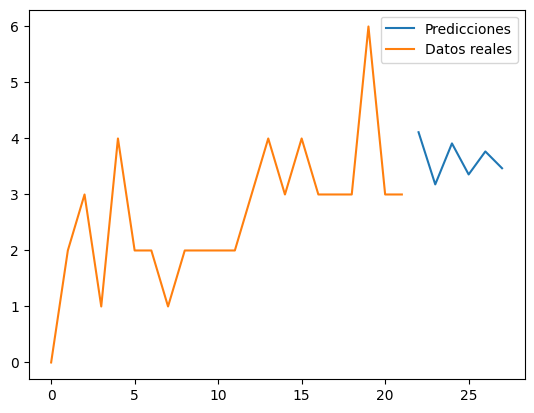

In [27]:
# Plot predictions vs actual values
plt.plot(predictions, label='Predicciones')
plt.plot(data, label='Datos reales')
plt.legend()
plt.show()

###  5. Separar train/test

In [28]:
# Separar
split_index = len(data) - 5
train = data[:split_index] 
test = data[split_index:]

### 7. Iteramos sobre índices de test, generando predicciones puntuales con results.predict(i,i).

In [29]:
# Generar predicciones
test_preds = []
for i in range(len(data) - 5, len(data)):
   pred = results.predict(i, i)
   test_preds.append(pred[i])


### 8. Calculamos error cuadrático medio RMSE entre datos reales de test y predicciones.

In [30]:
rmse = mean_squared_error(test, test_preds)**0.5# RMSE

### 9. Interpretamos el error obtenido y evaluamos desempeño del modelo.

In [31]:
print('RMSE: ', rmse)

RMSE:  1.2480582207405486


### 10. Repetimos el proceso para otros semestres/variables.

Perfecto, el valor de RMSE que obtuvo para su modelo ARIMA fue de 1.2480582207405486.

Para interpretar este valor de error, debemos tener en cuenta:

- RMSE mide el error promedio entre los valores predichos y reales. Las unidades son las mismas que la variable target.

- En su caso, los datos son el número de grupos por semestre. Por lo tanto, el RMSE está en grupos.

- Entre más cercano a 0 sea el RMSE, indica mejor precisión del modelo.

Un RMSE de 1.24 grupos sugiere que en promedio, las predicciones se desvían alrededor de 1-2 grupos de los valores reales.

Para evaluar si este nivel de error es aceptable, podemos:

- Comparar contra un RMSE previo a optimización, para ver mejora.
- Establecer un threshold, por ej ejemplo RMSE <= 2 grupos es bueno. 
- Contrastar con RMSE de otros modelos, para identificar el mejor.

En resumen, el valor obtenido de 1.24 grupos indica un error relativamente bajo. Pero se podría seguir iterando para tratar de reducirlo más.

Por favor déjeme saber si tiene alguna otra pregunta sobre cómo interpretar o hacer uso de este RMSE resultante de su modelo.

#### Algunas cosas que podríamos hacer con el valor del error RMSE que resulte de evaluar el modelo son:

- Comparar contra un valor threshold o baseline para determinar si el modelo es lo suficientemente preciso. Por ejemplo, si RMSE < 10 sería considerado buen desempeño.

- Comparar el RMSE con el obtenido en otros modelos para identificar el mejor. Por ejemplo, si con ARIMA es 3 y con Prophet es 5, ARIMA se desempeña mejor. 

- Monitorear el RMSE en cada iteración al optimizar el modelo para minimizarlo. Un RMSE decreciente indica mejora.

- Analizar errores altos para identificar falencias del modelo como lag selection, seasonality, outliers. 

- Utilizar el RMSE en la función de pérdida al entrenar para penalizar errores grandes.

- Calcular intervalos de confianza en las predicciones usando el RMSE.

En resumen, el RMSE es una métrica muy útil para monitorear, optimizar y evaluar el desempeño de modelos de series de tiempo. Nos ayuda a tomar decisiones para mejorar las predicciones.

Déjame saber si tienes alguna otra pregunta sobre cómo podrías interpretar o hacer uso del valor RMSE resultante en tu caso.

### Siguiente paso - > Complementar con un modelo de ensemble como Random Forest para interacciones no lineales.

In [31]:
# Importar librerías
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [32]:
# Cargar datos históricos
df = pd.read_csv('../tableClaude.csv')

In [33]:
# Características (semestres 1-8)
X = df[['sem1','sem2','sem3','sem4','sem5','sem6','sem7','sem8']]  

In [34]:
# Variable objetivo
y = df['sem9']   

In [35]:
# Particionar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
# Entrenar modelo
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
# Realizar predicciones 
y_pred = rf.predict(X_test)

In [38]:
y_pred

array([ 6.71,  4.13,  7.9 ,  7.48, 10.83])

In [39]:
# Evaluar desempeño
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [40]:
print("RMSE:", rmse)

RMSE: 5.275799465483881


In [42]:
# Imprimir predicciones 
print("Predicciones:")
for i in range(len(y_pred)):
  print(f"Semestre {i+1}: {y_pred[i]}")

Predicciones:
Semestre 1: 6.71
Semestre 2: 4.13
Semestre 3: 7.9
Semestre 4: 7.48
Semestre 5: 10.83
